In [12]:
import pandas as pd
import numpy as np

In [50]:

df= pd.read_excel("C:/Users/Florencia Cires/OneDrive/Documentos/Maximo/Datos limpios.xlsx")
df.head()

,AÑO,TOTAL,ORO,DIVISAS,total base monetaria,Billetes poder del publico,billetes bancos,base monetaria,Tipo de cambio,Prestamos bancarios % PBI
0,1917,604.8,306.5,298.27,0.000101,0.000047,0.000054,0.000105,2.278200e-13,25.732992
1,1918,703.5,366.8,336.68,0.000115,0.000050,0.000066,0.000119,2.240000e-13,25.971463
2,1919,735.3,376.1,359.19,0.000118,0.000057,0.000061,0.000121,2.300500e-13,28.173071
3,1920,839.2,455.8,383.43,0.000136,0.000051,0.000085,0.000141,2.541100e-13,27.101211
4,1921,824.9,453.8,371.07,0.000136,0.000047,0.000090,0.000141,3.143000e-13,29.696410


In [38]:
from sklearn.preprocessing import MinMaxScaler

# Crear el normalizador
normalizer = MinMaxScaler()

# Normalizar las columnas seleccionadas
df_normalizado = pd.DataFrame(normalizer.fit_transform(df[columns_to_scale]), 
                              columns=columns_to_scale)

# Verificar los resultados
print(df_normalizado.head())


      TOTAL       ORO   DIVISAS  total base monetaria  \
0  0.311205  0.192194  0.519029              0.000000   
1  0.465015  0.389964  0.585778              0.359830   
2  0.514571  0.420466  0.624896              0.417677   
3  0.676484  0.681863  0.667020              0.889718   
4  0.654200  0.675303  0.645541              0.889720   

   Billetes poder del publico  billetes bancos  base monetaria  \
0                    0.001848         0.360292        0.000000   
1                    0.048059         0.569222        0.193072   
2                    0.186691         0.475119        0.224226   
3                    0.075786         0.918654        0.477420   
4                    0.000000         1.000000        0.477420   

   Tipo de cambio  Prestamos bancarios % PBI  
0        0.018295                   0.431862  
1        0.000000                   0.442705  
2        0.028975                   0.542814  
3        0.144205                   0.494076  
4        0.432471        

In [14]:
# Número de simulaciones
n_simulaciones = 10000

# Generar simulaciones para ORO, DIVISAS y Billetes poder del público estandarizados o normalizados
simulated_oro = np.random.normal(df_estandarizado['ORO'].mean(), df_estandarizado['ORO'].std(), n_simulaciones)
simulated_divisas = np.random.normal(df_estandarizado['DIVISAS'].mean(), df_estandarizado['DIVISAS'].std(), n_simulaciones)
simulated_billetes = np.random.normal(df_estandarizado['Billetes poder del publico'].mean(), df_estandarizado['Billetes poder del publico'].std(), n_simulaciones)

# Crear un DataFrame con las simulaciones
df_simulacion = pd.DataFrame({
    'Simulacion ORO': simulated_oro,
    'Simulacion DIVISAS': simulated_divisas,
    'Simulacion Billetes': simulated_billetes
})

# Asumimos una relación lineal para predecir el tipo de cambio, puedes ajustar esto según el modelo que prefieras
simulated_tipo_cambio = (0.4 * df_simulacion['Simulacion ORO'] + 
                         0.3 * df_simulacion['Simulacion DIVISAS'] + 
                         0.3 * df_simulacion['Simulacion Billetes'])

# Mostrar los resultados de la simulación del tipo de cambio
print(f"Tipo de cambio simulado medio: {np.mean(simulated_tipo_cambio)}")
print(f"Tipo de cambio simulado 5%: {np.percentile(simulated_tipo_cambio, 5)}")
print(f"Tipo de cambio simulado 95%: {np.percentile(simulated_tipo_cambio, 95)}")


Tipo de cambio simulado medio: -0.0016013761964849842
Tipo de cambio simulado 5%: -0.9732141814242812
Tipo de cambio simulado 95%: 0.9834950477294363


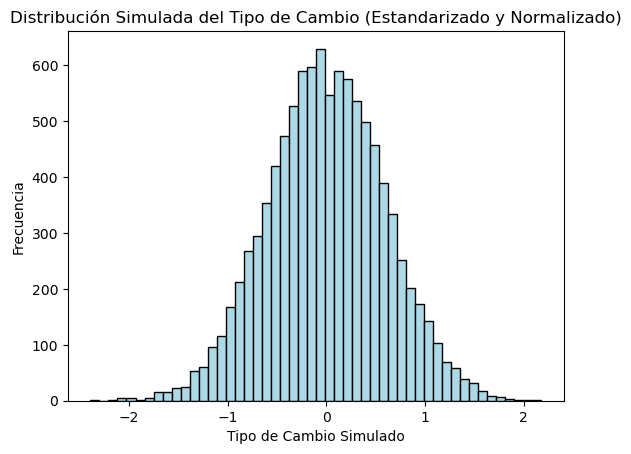

Tipo de cambio simulado medio: -0.0016013761964849842
Tipo de cambio simulado 5%: -0.9732141814242812
Tipo de cambio simulado 95%: 0.9834950477294363


In [44]:
import matplotlib.pyplot as plt
# Graficar la distribución simulada del tipo de cambio
plt.hist(simulated_tipo_cambio, bins=50, color='lightblue', edgecolor='black')
plt.title('Distribución Simulada del Tipo de Cambio (Estandarizado y Normalizado)')
plt.xlabel('Tipo de Cambio Simulado')
plt.ylabel('Frecuencia')
plt.show()
# Mostrar los resultados de la simulación del tipo de cambio
print(f"Tipo de cambio simulado medio: {np.mean(simulated_tipo_cambio)}")
print(f"Tipo de cambio simulado 5%: {np.percentile(simulated_tipo_cambio, 5)}")
print(f"Tipo de cambio simulado 95%: {np.percentile(simulated_tipo_cambio, 95)}")


                            OLS Regression Results                            
Dep. Variable:         Tipo de cambio   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     13.98
Date:                Wed, 02 Oct 2024   Prob (F-statistic):           1.86e-05
Time:                        10:42:33   Log-Likelihood:                 691.45
No. Observations:                  23   AIC:                            -1365.
Df Residuals:                      14   BIC:                            -1355.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

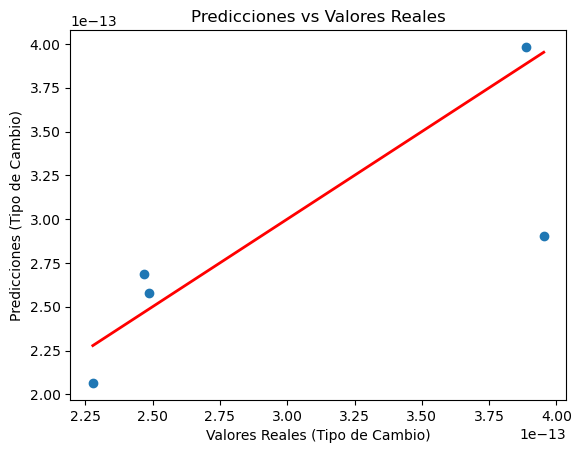

In [26]:
# Importar las bibliotecas necesarias
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# Supongamos que tus datos originales están en las variables X y y
# X contiene las variables 'ORO', 'DIVISAS', 'Billetes poder del publico', etc.
# y contiene la columna 'Tipo de cambio'
import statsmodels.api as sm

# Definir variables dependiente e independientes
X = df[['TOTAL', 'ORO', 'DIVISAS', 'total base monetaria', 'Billetes poder del publico', 
        'billetes bancos', 'base monetaria', 'Prestamos bancarios % PBI']]
y = df['Tipo de cambio']

# Añadir constante para la regresión (intercepto)
X = sm.add_constant(X)

# Ajustar el modelo de regresión lineal múltiple
model = sm.OLS(y, X).fit()

# Mostrar el resumen del modelo
print(model.summary())
# Estandarizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Normalizar las variables independientes (predictoras)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Realizar predicciones en los datos de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo utilizando el error cuadrático medio (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Error cuadrático medio en datos históricos: {mse:.4f}")

# Opcional: puedes visualizar las predicciones versus los valores reales
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.xlabel('Valores Reales (Tipo de Cambio)')
plt.ylabel('Predicciones (Tipo de Cambio)')
plt.title('Predicciones vs Valores Reales')
plt.show()


In [28]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, y)

# Coeficientes del modelo
coefficients = model.coef_
intercept = model.intercept_

print("Coeficientes:", coefficients)
print("Intercepto:", intercept)


Coeficientes: [ 0.00000000e+00  9.73903560e-14 -9.76158066e-14 -9.76943748e-14
 -7.57596895e-08  7.61854955e-08  7.63635489e-08  2.05074254e-09
  2.60926903e-15]
Intercepto: 4.726851379175603e-14


Error cuadrático medio en datos simulados: 0.0732


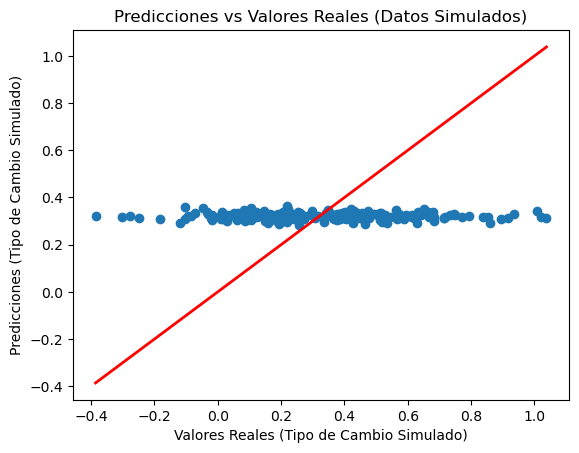

In [32]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Supongamos que tus datos originales están en X y y
# X contiene las variables 'ORO', 'DIVISAS', 'Billetes poder del publico', etc.
# y contiene la columna 'Tipo de cambio'
# Definir variables dependiente e independientes
X = df_normalizado[['TOTAL', 'ORO', 'DIVISAS', 'total base monetaria', 'Billetes poder del publico', 
        'billetes bancos', 'base monetaria', 'Prestamos bancarios % PBI']]
y = df_normalizado['Tipo de cambio']

# 1. Calcular la mediana y desviación estándar de cada columna de X
medians = X.median()
std_devs = X.std()

# Crear un nuevo conjunto de datos con 1000 puntos para cada variable
simulated_data = {}

# Generar los datos simulados
np.random.seed(42)  # Para reproducibilidad
for column in X.columns:
    # Generar 1000 datos aleatorios para cada variable usando la mediana y la desviación estándar
    simulated_data[column] = np.random.normal(loc=medians[column], scale=std_devs[column], size=1000)

# Crear un DataFrame con los datos simulados
X_simulated = pd.DataFrame(simulated_data)

# Para la variable dependiente (Tipo de Cambio), repetimos el proceso
y_median = y.median()
y_std = y.std()
y_simulated = np.random.normal(loc=y_median, scale=y_std, size=1000)

# 2. Dividir los datos simulados en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_simulated, y_simulated, test_size=0.2, random_state=42)

# 3. Crear y entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# 4. Realizar predicciones en los datos de prueba
y_pred = model.predict(X_test)

# 5. Evaluar el modelo utilizando el error cuadrático medio (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Error cuadrático medio en datos simulados: {mse:.4f}")

# 6. Visualización opcional: Predicciones vs Valores Reales
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.xlabel('Valores Reales (Tipo de Cambio Simulado)')
plt.ylabel('Predicciones (Tipo de Cambio Simulado)')
plt.title('Predicciones vs Valores Reales (Datos Simulados)')
plt.show()


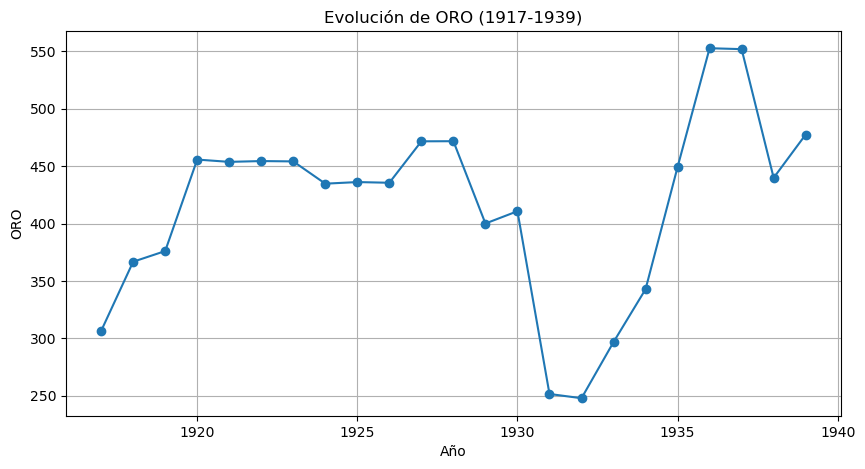

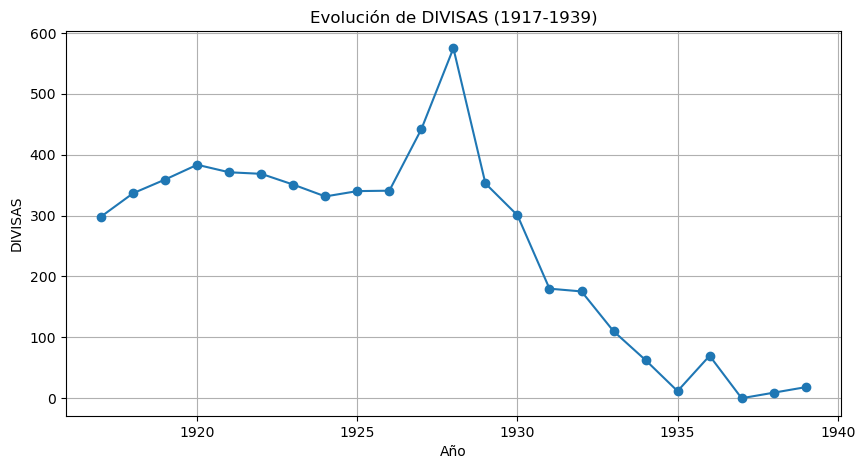

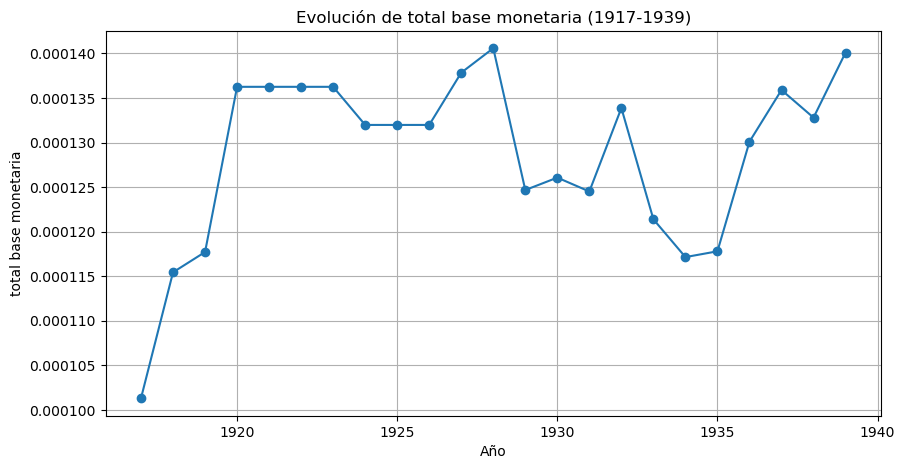

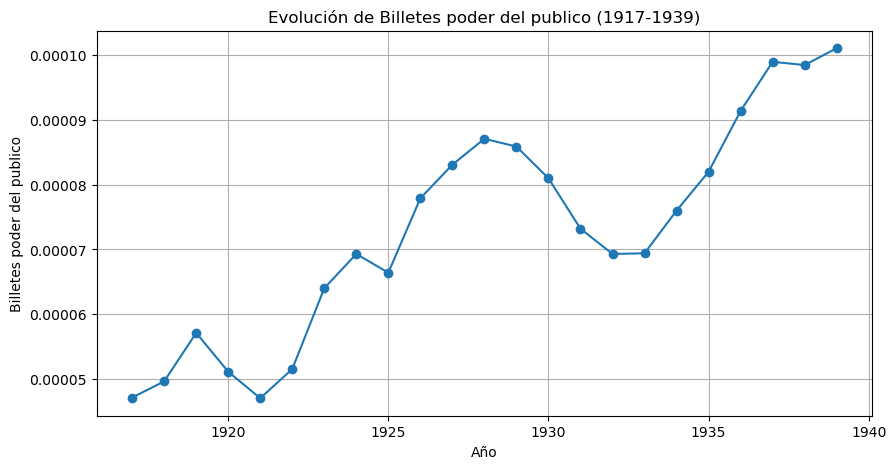

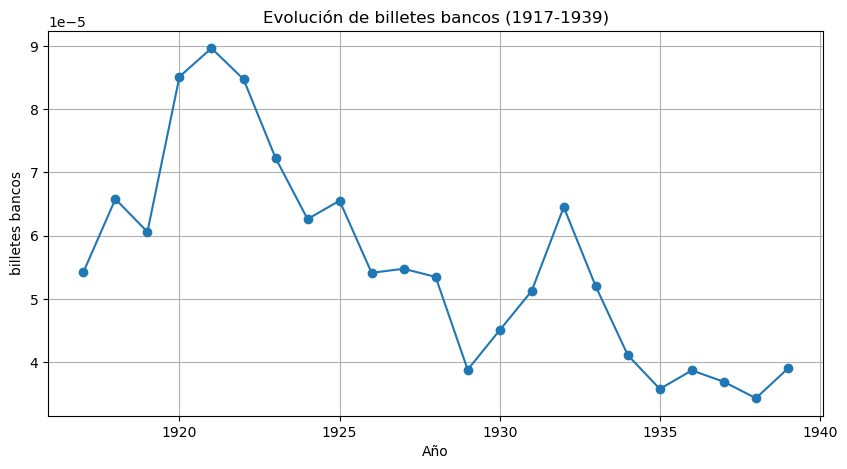

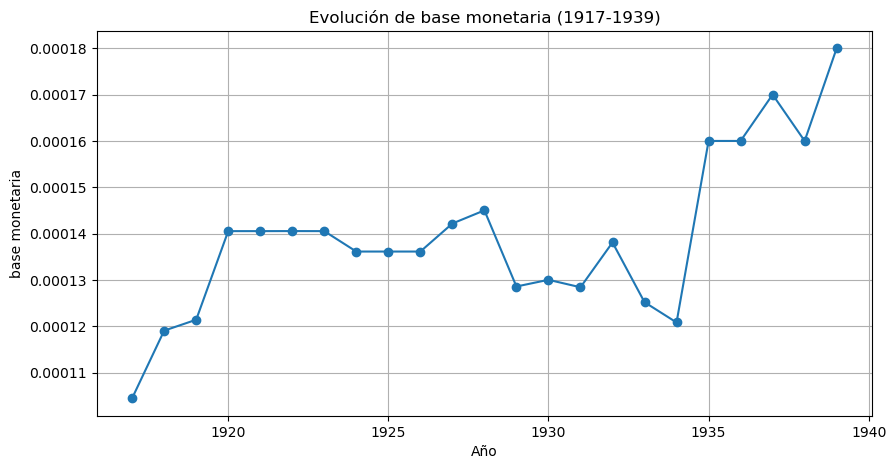

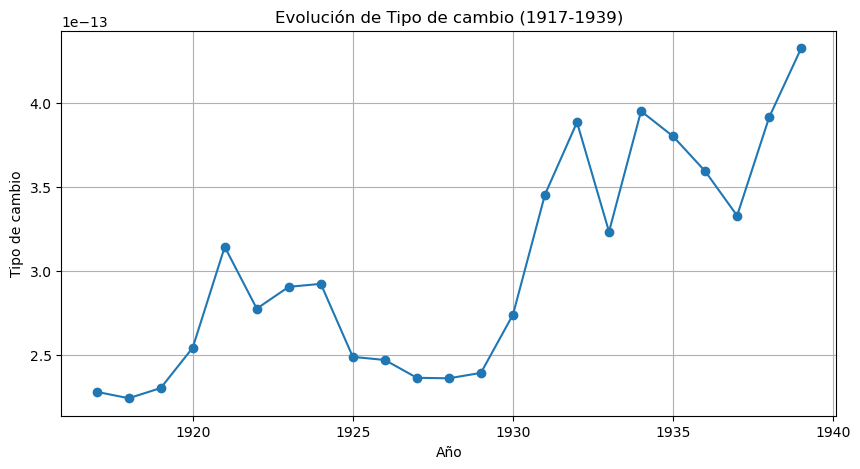

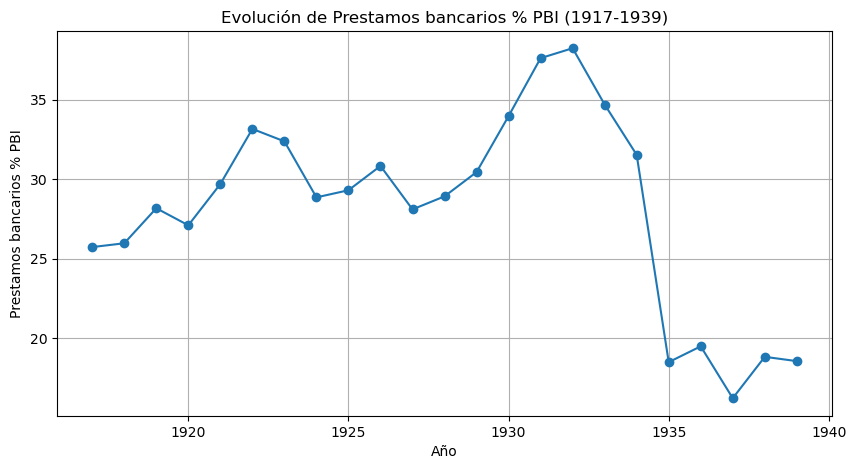

In [40]:
import matplotlib.pyplot as plt

# PARA GRAFICAR LAS SERIES DE CADA VARIABLE
for column in df_normalizado.columns[1:]:
    plt.figure(figsize=(10, 5))
    plt.plot(df['AÑO'], df[column], marker='o')
    plt.title(f'Evolución de {column} (1917-1939)')
    plt.xlabel('Año')
    plt.ylabel(column)
    plt.grid(True)
    plt.show()

In [46]:
import statsmodels.api as sm

# Definir variables dependiente e independientes
X = df_normalizado[['TOTAL', 'ORO', 'DIVISAS', 'total base monetaria', 'Billetes poder del publico', 
        'billetes bancos', 'base monetaria', 'Prestamos bancarios % PBI']]
y = df_normalizado['Tipo de cambio']

# Añadir constante para la regresión (intercepto)
X = sm.add_constant(X)

# Ajustar el modelo de regresión lineal múltiple
model = sm.OLS(y, X).fit()

# Mostrar el resumen del modelo
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         Tipo de cambio   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     13.98
Date:                Thu, 03 Oct 2024   Prob (F-statistic):           1.86e-05
Time:                        08:34:37   Log-Likelihood:                 19.913
No. Observations:                  23   AIC:                            -21.83
Df Residuals:                      14   BIC:                            -11.61
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               